In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
import warnings 
warnings.filterwarnings("ignore")
pio.templates.default = "simple_white"

In [4]:
%matplotlib inline

In [5]:
bikes = pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,01-02-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,01-03-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,01-04-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,01-05-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bikes.drop("instant", axis=1, inplace=True)

In [9]:
bikes.dteday = pd.to_datetime(bikes.dteday, format="%d-%m-%Y")
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
bikes.weekday = bikes.weekday.astype("category")
bikes.mnth = bikes.mnth.astype("category")
bikes.season = bikes.season.astype("category")
bikes.weathersit = bikes.weathersit.astype("category")
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
bikes.dtypes

dteday        datetime64[ns]
season              category
yr                     int64
mnth                category
holiday                int64
weekday             category
workingday             int64
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [12]:
#convert weekday, mnth, season and weathersit to meaningfull data

In [13]:
bikes.weekday = bikes.weekday.map({0:"weekday_sunday",1:"weekday_monday",2:"weekday_tuesday",3:"weekday_wednesday",
                                  4:"weekday_thursday",5:"weekday_friday",6:"weekday_saturday"})
bikes.mnth = bikes.mnth.map({1:"mnth_january",2:"mnth_february",3:"mnth_march",4:"mnth_april",
                                  5:"mnth_may",6:"mnth_june",7:"mnth_july",8:"mnth_august",9:"mnth_september",
                             10:"mnth_october",11:"mnth_november",12:"mnth_december"})
bikes.season = bikes.season.map({1:"season_spring", 2:"season_summer", 3:"season_fall", 4:"season_winter"})
bikes.weathersit = bikes.weathersit.map({1:"weather_clear", 2:"weather_cloudy", 3:"weather_lightrain",
                                         4:"weather_heavyrain"})

In [14]:
# Exploratory Data Analysis

In [15]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,season_spring,0,mnth_january,0,weekday_monday,1,weather_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,season_spring,0,mnth_january,0,weekday_tuesday,1,weather_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,season_spring,0,mnth_january,0,weekday_wednesday,1,weather_clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,season_spring,0,mnth_january,0,weekday_thursday,1,weather_clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,season_spring,0,mnth_january,0,weekday_friday,1,weather_clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


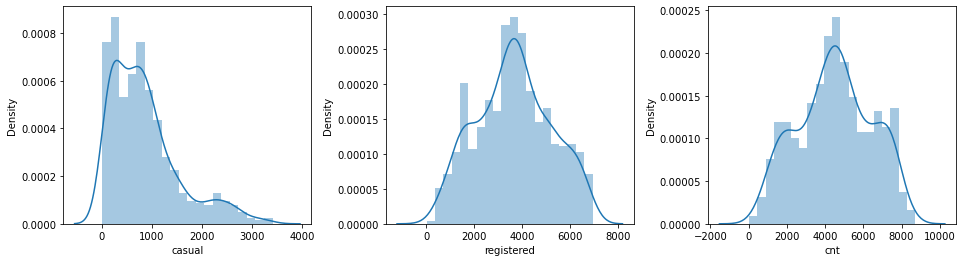

In [16]:
# distribution of Count of total users vs registered users as well as casual users
var = ["casual","registered","cnt"]
plt.figure(figsize=(16,4))
for i in range(len(var)):
    plt.subplot(1,len(var),i+1)
    sns.distplot(bikes[var[i]], bins=20)
plt.subplots_adjust(wspace=0.3)
plt.show()

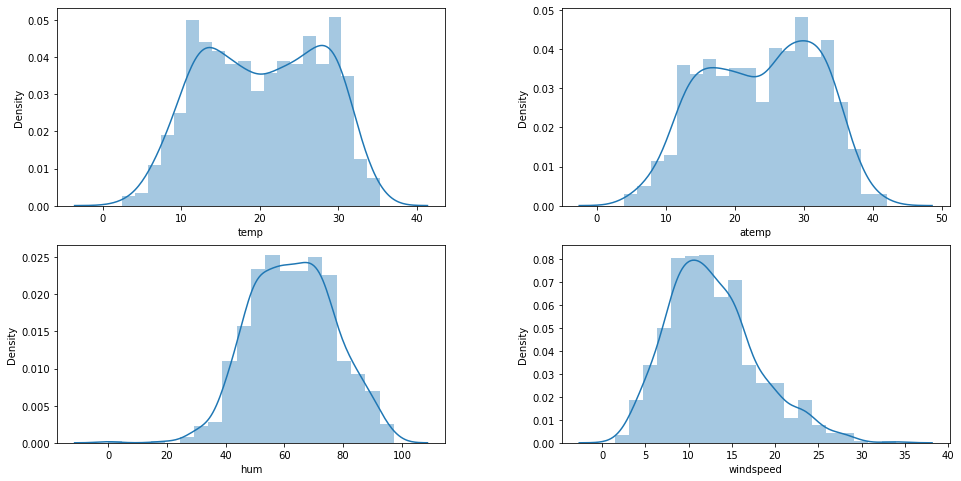

In [17]:
# distribution of continuous variables
var = ["temp","atemp","hum","windspeed"]
plt.figure(figsize=(16,8))
for i in range(len(var)):
    plt.subplot(2,2,i+1)
    sns.distplot(bikes[var[i]], bins=20)
plt.subplots_adjust(wspace=0.3)
plt.show()

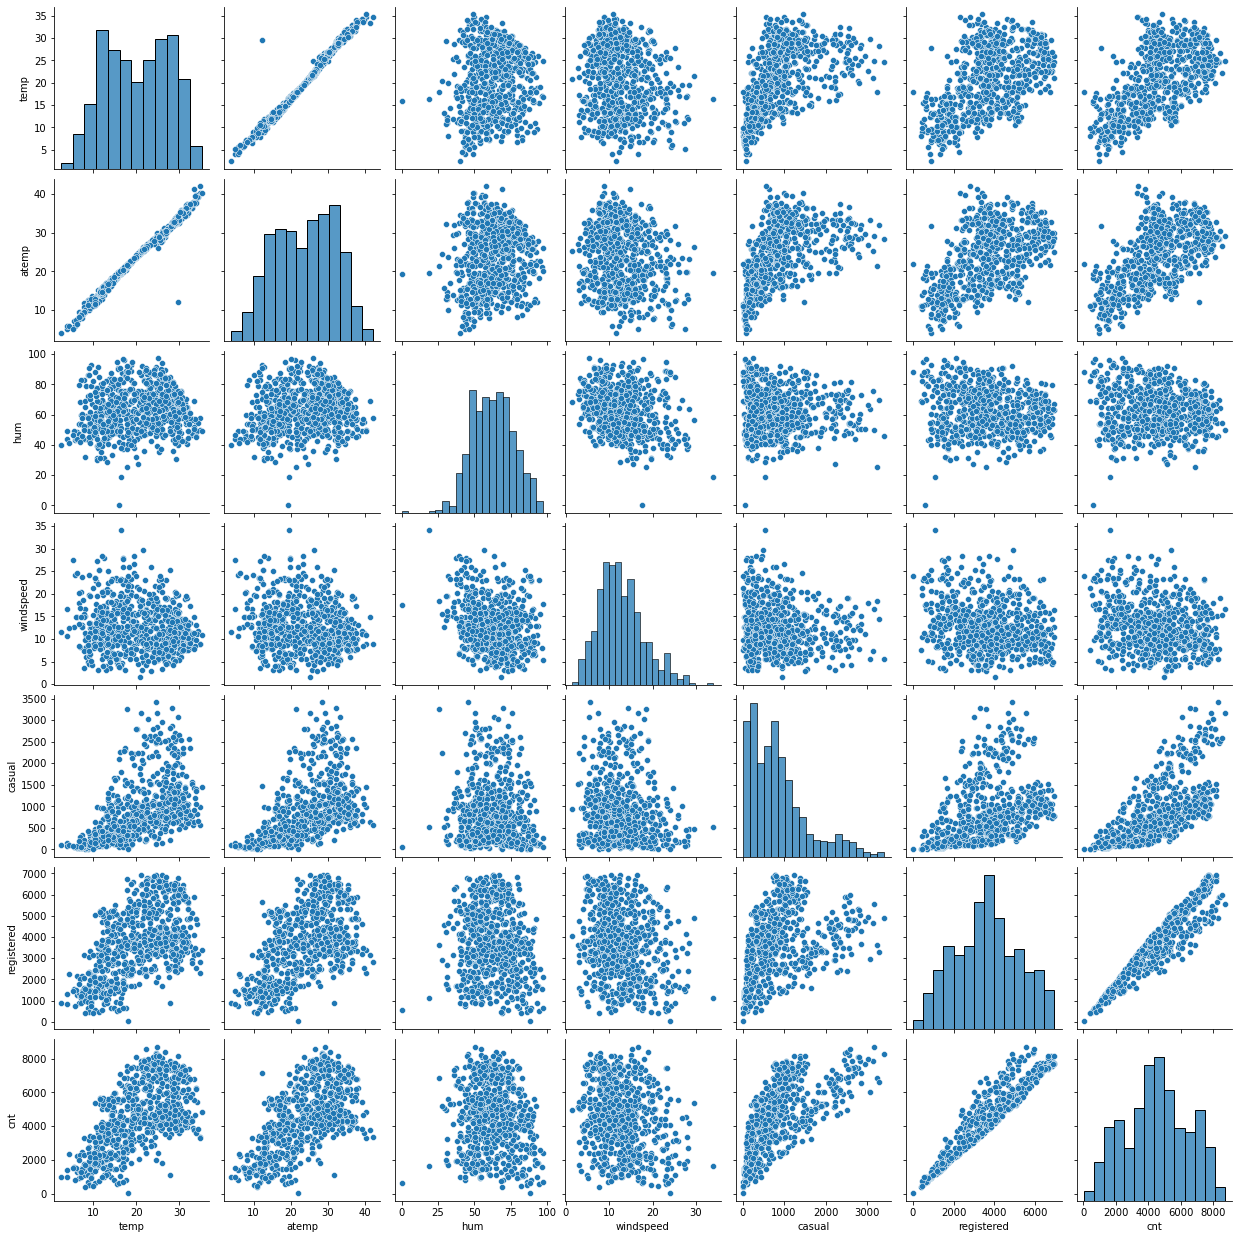

In [19]:
#visulaize the continiuous variables against each other
variables = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered', 'cnt']
sns.pairplot(data = bikes, vars=variables)
plt.show()

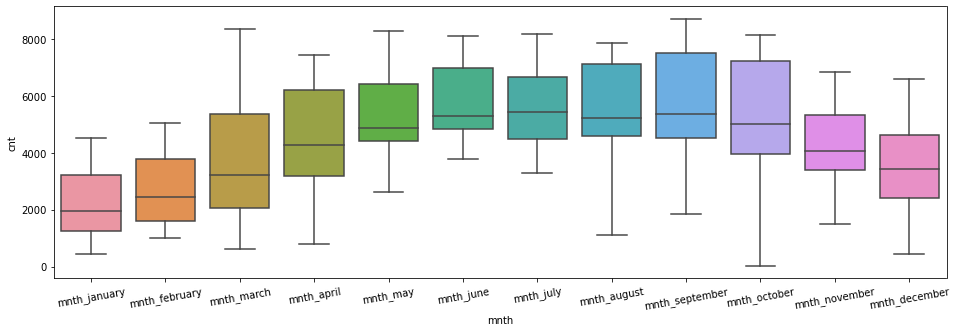

In [20]:
#visualizing month varaible against cnt
plt.figure(figsize=(16,5))
sns.boxplot(data=bikes, x="mnth", y="cnt")
plt.xticks(rotation=10)
plt.show()

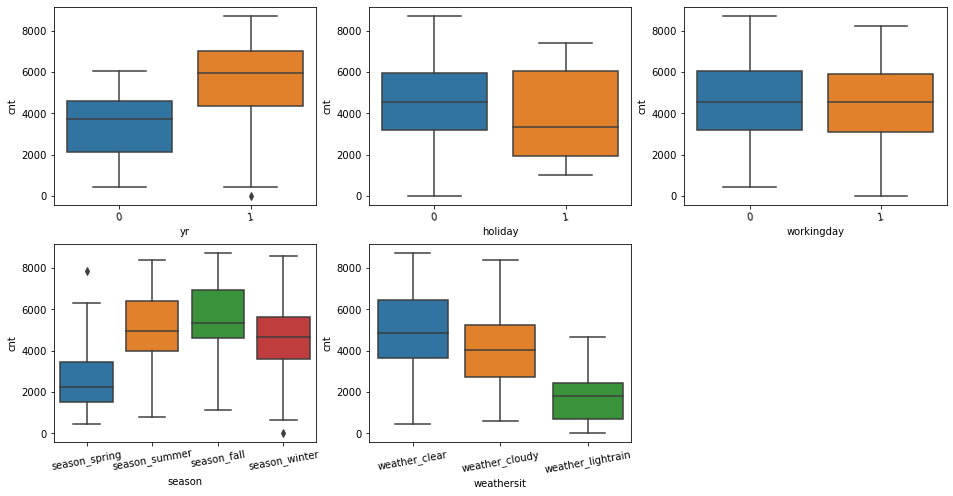

In [21]:
# Visulaizing Categorical variables against the Target variable "cnt"
var = ["yr","holiday","workingday","season","weathersit"]
plt.figure(figsize=(16,8))
for i in range(len(var)):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=bikes, x=var[i], y="cnt")
    plt.xticks(rotation=10)
plt.show()

In [23]:
#categories for temp, hum and windspeed
bikes["temp_range"] = pd.qcut(bikes.temp, 4, labels=["very_low_temp", "low_medium_temp","high_medium_temp","very_high_temp"])
bikes["hum_range"] = pd.qcut(bikes.hum, 4, labels=["very_low_hum", "low_medium_hum","high_medium_hum","very_high_hum"])
bikes["wind_range"] = pd.qcut(bikes.windspeed, 4, labels=["very_low_wind", "low_medium_wind","high_medium_wind","very_high_wind"])

In [24]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_range,hum_range,wind_range
0,2018-01-01,season_spring,0,mnth_january,0,weekday_monday,1,weather_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,low_medium_temp,very_high_hum,low_medium_wind
1,2018-02-01,season_spring,0,mnth_january,0,weekday_tuesday,1,weather_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,low_medium_temp,high_medium_hum,very_high_wind
2,2018-03-01,season_spring,0,mnth_january,0,weekday_wednesday,1,weather_clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,very_low_temp,very_low_hum,very_high_wind
3,2018-04-01,season_spring,0,mnth_january,0,weekday_thursday,1,weather_clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,very_low_temp,low_medium_hum,low_medium_wind
4,2018-05-01,season_spring,0,mnth_january,0,weekday_friday,1,weather_clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,very_low_temp,very_low_hum,high_medium_wind


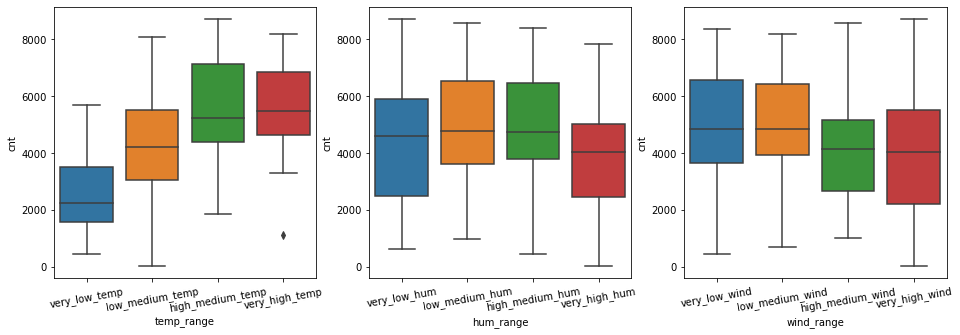

In [25]:
variables = ["temp_range","hum_range","wind_range"]
plt.figure(figsize=(16,5))
for i in range(len(variables)):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=bikes, x=variables[i], y="cnt")
    plt.xticks(rotation=10)
plt.show()

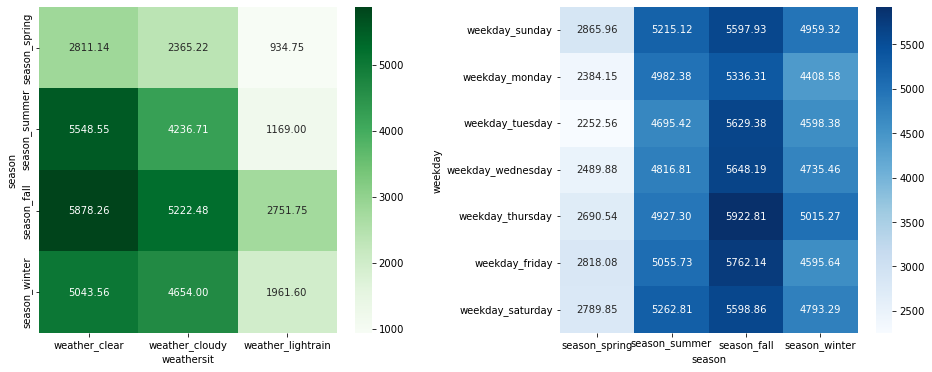

In [26]:
# visulaizing the combination of variables against the target varaible
plt.figure(figsize=(16,6))
plt.subplot(121)
df_temp = pd.pivot_table(data=bikes, index="season", columns="weathersit", values="cnt", aggfunc="mean")
sns.heatmap(df_temp, annot=True, cmap="Greens", fmt="1.2f")

plt.subplot(122)
df_temp = pd.pivot_table(data=bikes, index="weekday", columns="season", values="cnt", aggfunc="mean",)
sns.heatmap(df_temp, annot=True, cmap="Blues", fmt="1.2f")

plt.subplots_adjust(wspace=0.4)
plt.show()

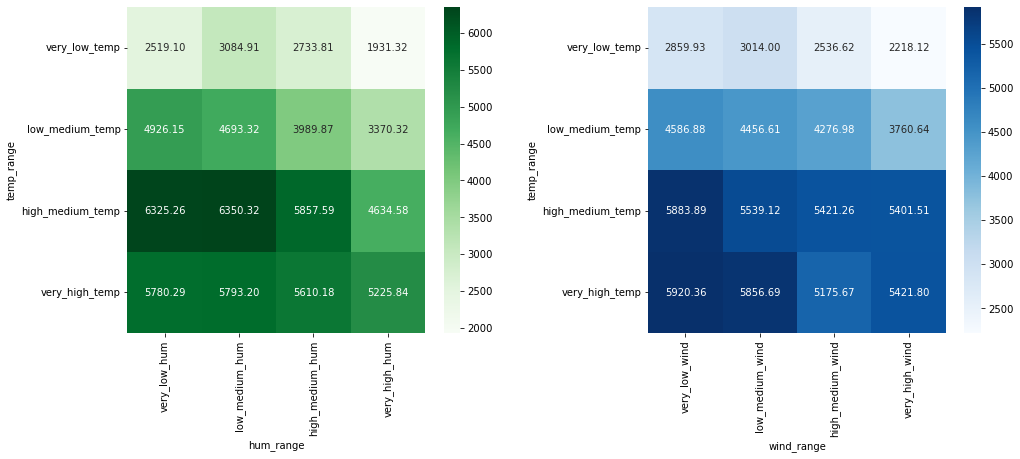

In [27]:
plt.figure(figsize=(16,6))
plt.subplot(121)
df_temp = pd.pivot_table(data=bikes, index="temp_range", columns="hum_range", values="cnt", aggfunc="mean")
sns.heatmap(df_temp, annot=True, cmap="Greens", fmt="1.2f")

plt.subplot(122)
df_temp = pd.pivot_table(data=bikes, index="temp_range", columns="wind_range", values="cnt", aggfunc="mean",)
sns.heatmap(df_temp, annot=True, cmap="Blues", fmt="1.2f")

plt.subplots_adjust(wspace=0.4)
plt.show()

In [30]:
#Multiple Regression 

In [31]:
#Creating dummies for categorical variable
temp = pd.get_dummies(bikes.season, drop_first=True)
bikes = pd.concat([bikes,temp], axis=1)

temp = pd.get_dummies(bikes.weathersit, drop_first=True)
bikes = pd.concat([bikes,temp], axis=1)

temp = pd.get_dummies(bikes.weekday, drop_first=True)
bikes = pd.concat([bikes,temp], axis=1)

temp = pd.get_dummies(bikes.mnth, drop_first=True)
bikes = pd.concat([bikes,temp], axis=1)

temp = pd.get_dummies(bikes.temp_range, drop_first=True)
bikes = pd.concat([bikes,temp], axis=1)

temp = pd.get_dummies(bikes.hum_range, drop_first=True)
bikes = pd.concat([bikes,temp], axis=1)

temp = pd.get_dummies(bikes.wind_range, drop_first=True)
bikes = pd.concat([bikes,temp], axis=1)

In [32]:
# droping season,weathersit, weekday and mnth variables
bikes.drop(["season","weathersit", "weekday","mnth","temp_range","hum_range","wind_range"], axis=1, inplace=True)
bikes.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_december,low_medium_temp,high_medium_temp,very_high_temp,low_medium_hum,high_medium_hum,very_high_hum,low_medium_wind,high_medium_wind,very_high_wind
0,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,...,0,1,0,0,0,0,1,1,0,0
1,2018-02-01,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,...,0,1,0,0,0,1,0,0,0,1
2,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,0,0,1
3,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,1,0,0,1,0,0
4,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,1,0


In [33]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dteday             730 non-null    datetime64[ns]
 1   yr                 730 non-null    int64         
 2   holiday            730 non-null    int64         
 3   workingday         730 non-null    int64         
 4   temp               730 non-null    float64       
 5   atemp              730 non-null    float64       
 6   hum                730 non-null    float64       
 7   windspeed          730 non-null    float64       
 8   casual             730 non-null    int64         
 9   registered         730 non-null    int64         
 10  cnt                730 non-null    int64         
 11  season_summer      730 non-null    uint8         
 12  season_fall        730 non-null    uint8         
 13  season_winter      730 non-null    uint8         
 14  weather_cl

In [34]:
# drop the dteday variable as all the dates, month, year have been extracted 
bikes.drop(["dteday"], axis=1, inplace=True)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_december,low_medium_temp,high_medium_temp,very_high_temp,low_medium_hum,high_medium_hum,very_high_hum,low_medium_wind,high_medium_wind,very_high_wind
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,1,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,1,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,1,0


In [35]:
#Feature Selection

In [36]:
bikes["Ratio"] = bikes.registered/bikes.casual
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,low_medium_temp,high_medium_temp,very_high_temp,low_medium_hum,high_medium_hum,very_high_hum,low_medium_wind,high_medium_wind,very_high_wind,Ratio
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,1,0,0,0,0,1,1,0,0,1.975831
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,1,0,0,0,1,0,0,0,1,5.114504
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,0,1,10.241667
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,1,0,0,1,0,0,13.462963
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,1,0,18.512195


In [37]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   atemp              730 non-null    float64
 5   hum                730 non-null    float64
 6   windspeed          730 non-null    float64
 7   casual             730 non-null    int64  
 8   registered         730 non-null    int64  
 9   cnt                730 non-null    int64  
 10  season_summer      730 non-null    uint8  
 11  season_fall        730 non-null    uint8  
 12  season_winter      730 non-null    uint8  
 13  weather_cloudy     730 non-null    uint8  
 14  weather_lightrain  730 non-null    uint8  
 15  weekday_monday     730 non-null    uint8  
 16  weekday_tuesday    730 non

In [38]:
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,low_medium_temp,high_medium_temp,very_high_temp,low_medium_hum,high_medium_hum,very_high_hum,low_medium_wind,high_medium_wind,very_high_wind,Ratio
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,1,0,0,0,0,1,1,0,0,1.975831
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,1,0,0,0,1,0,0,0,1,5.114504
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,0,1,10.241667
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,1,0,0,1,0,0,13.462963
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,1,0,18.512195


<Figure size 1152x864 with 0 Axes>

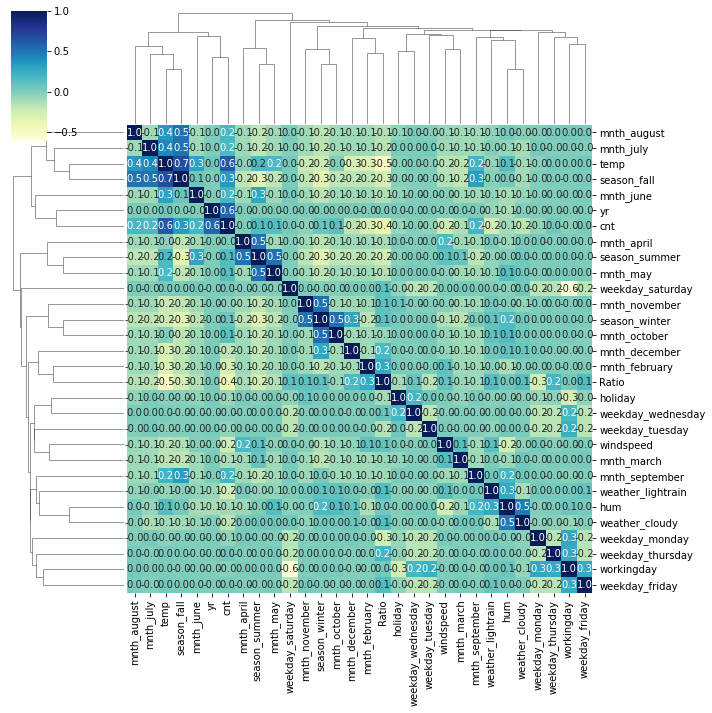

In [103]:
plt.figure(figsize=(16,12))
corelation_matrix = bikes.corr()
sns.clustermap(corelation_matrix, cmap="YlGnBu", annot=True, fmt="1.1f")
plt.show()

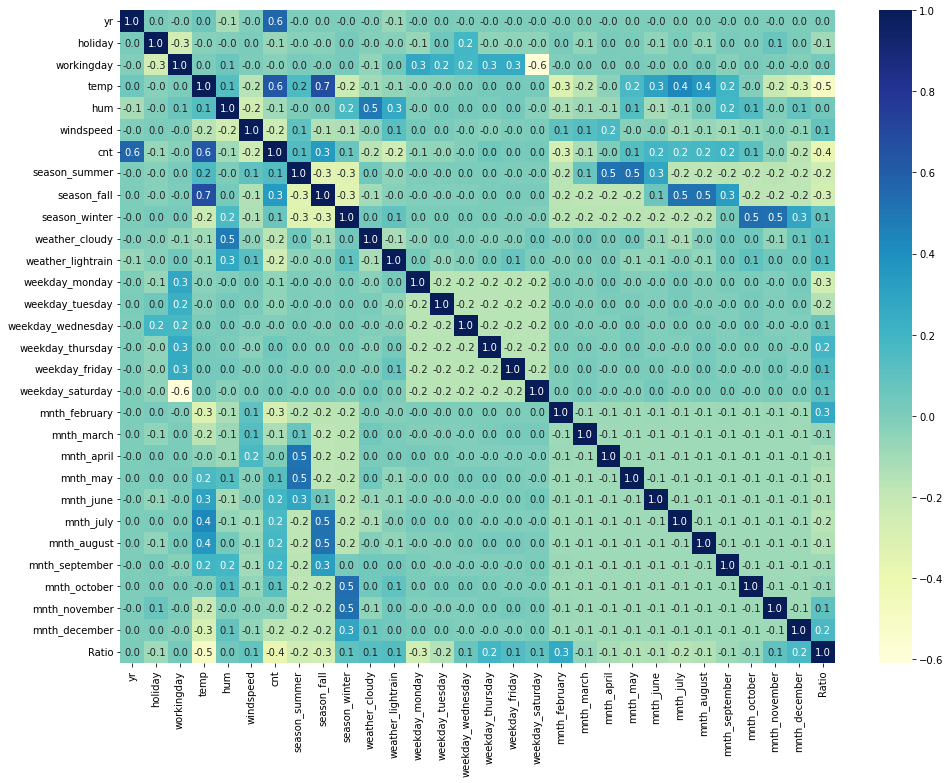

In [113]:
plt.figure(figsize=(16,12))
corelation_matrix = bikes.corr()
sns.heatmap(corelation_matrix, cmap="YlGnBu", annot=True, fmt="1.1f")
plt.show()

In [40]:
# dropping atemp, registered and casual variables as they are highly correlated to temp and cnt, respectively
bikes.drop(["atemp","registered","casual"], axis=1, inplace=True)
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,low_medium_temp,high_medium_temp,very_high_temp,low_medium_hum,high_medium_hum,very_high_hum,low_medium_wind,high_medium_wind,very_high_wind,Ratio
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,1,1,0,0,1.975831
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,1,0,0,0,1,0,0,0,1,5.114504
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,0,1,10.241667
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,1,0,0,13.462963
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,18.512195


In [41]:
bikes.shape

(730, 39)

In [42]:
# drop categories created earlier
bikes.drop(['low_medium_temp',
       'high_medium_temp', 'very_high_temp', 'low_medium_hum',
       'high_medium_hum', 'very_high_hum', 'low_medium_wind',
       'high_medium_wind', 'very_high_wind'], axis=1, inplace=True)

In [108]:
#splitting the data
df_train,df_test = train_test_split(bikes, train_size=0.7, random_state = 0)
df_train.shape

(510, 30)

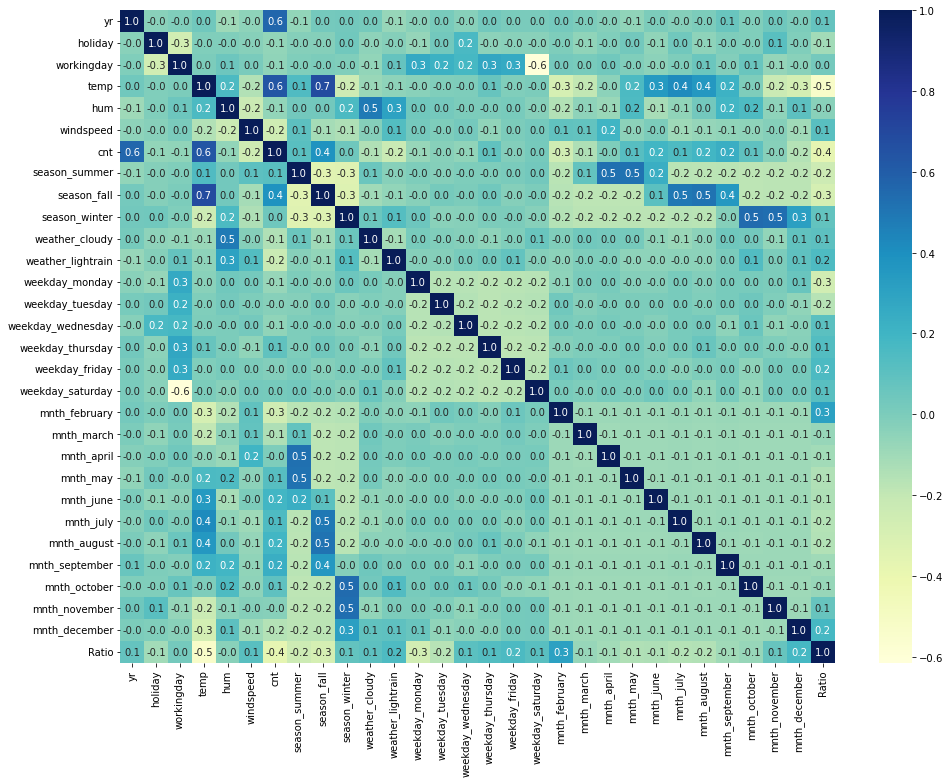

In [109]:
#checking the correlation between variables for training dataset
plt.figure(figsize=(16,12))
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True, fmt="1.1f")
plt.show()

In [45]:
#temp, yr, season_fall and Ratio have high correlation with the target variable

In [46]:
#scaling the data

In [110]:
scaler = MinMaxScaler()

In [111]:
# Only continuous variables needs rescaling 
cont_var = ["temp","hum","windspeed","cnt","Ratio"]
df_train[cont_var] = scaler.fit_transform(df_train[cont_var])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_april,mnth_may,mnth_june,mnth_july,mnth_august,mnth_september,mnth_october,mnth_november,mnth_december,Ratio
524,1,0,0,0.802869,0.254640,0.255430,0.860101,1,0,0,...,0,0,1,0,0,0,0,0,0,0.017204
12,0,0,0,0.089497,0.301044,0.647940,0.159227,0,0,0,...,0,0,0,0,0,0,0,0,0,0.744900
161,0,0,1,0.821384,0.557424,0.281887,0.568799,1,0,0,...,0,0,1,0,0,0,0,0,0,0.019401
556,1,0,1,0.810494,0.527842,0.274080,0.833180,0,1,0,...,0,0,0,1,0,0,0,0,0,0.116723
502,1,0,0,0.611185,0.374709,0.236721,0.876323,1,0,0,...,0,1,0,0,0,0,0,0,0,0.065110


In [112]:
# deriving y and X from train dataset
y_train = df_train.pop("cnt")
X_train = df_train

In [50]:
X_train.shape

(510, 29)

In [51]:
# Building Linear Regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [52]:
#extracting top 15 features from the model using recursive feature elimination
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [53]:
# look at the ranking and columns which are considered by Recursive Feature Elimination method
x = zip(df_train.columns,rfe.ranking_, rfe.support_)
for i in x:
    print(i)

('yr', 1, True)
('holiday', 1, True)
('workingday', 3, False)
('temp', 1, True)
('hum', 1, True)
('windspeed', 1, True)
('season_summer', 1, True)
('season_fall', 1, True)
('season_winter', 1, True)
('weather_cloudy', 1, True)
('weather_lightrain', 1, True)
('weekday_monday', 11, False)
('weekday_tuesday', 10, False)
('weekday_wednesday', 9, False)
('weekday_thursday', 4, False)
('weekday_friday', 6, False)
('weekday_saturday', 15, False)
('mnth_february', 12, False)
('mnth_march', 1, True)
('mnth_april', 2, False)
('mnth_may', 1, True)
('mnth_june', 8, False)
('mnth_july', 1, True)
('mnth_august', 7, False)
('mnth_september', 1, True)
('mnth_october', 1, True)
('mnth_november', 14, False)
('mnth_december', 13, False)
('Ratio', 5, False)


In [54]:
# removing variables from the list of indpendent variables which are not selected under RFE.
X_train_temp = X_train.columns[rfe.support_]
X_train = X_train[X_train_temp]
X_train.head()

,yr,holiday,temp,hum,windspeed,season_summer,season_fall,season_winter,weather_cloudy,weather_lightrain,mnth_march,mnth_may,mnth_july,mnth_september,mnth_october
524,1,0,0.802869,0.254640,0.255430,1,0,0,0,0,0,0,0,0,0
12,0,0,0.089497,0.301044,0.647940,0,0,0,0,0,0,0,0,0,0
161,0,0,0.821384,0.557424,0.281887,1,0,0,0,0,0,0,0,0,0
556,1,0,0.810494,0.527842,0.274080,0,1,0,0,0,0,0,1,0,0
502,1,0,0.611185,0.374709,0.236721,1,0,0,0,0,0,1,0,0,0


In [55]:
X_train.shape

(510, 15)

In [56]:
#looking at the Model with top 15 features and how they are contributing towards the Total Rentals

In [57]:
X_train_sm = sm.add_constant(X_train)
lm_sm_1 = sm.OLS(y_train, X_train_sm).fit()
print(lm_sm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     159.3
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          3.50e-178
Time:                        16:54:06   Log-Likelihood:                 505.65
No. Observations:                 510   AIC:                            -979.3
Df Residuals:                     494   BIC:                            -911.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2146      0.02

In [58]:
#All varaibles are significant and having low p values. 
#looking at their variance inflation factor to avoid any multicolinearity.

In [59]:
# checking variance inflation factor
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values("VIF",ascending=False)
vif

,Features,VIF
2,temp,19.614145
3,hum,10.705555
6,season_fall,7.555156
5,season_summer,4.022577
4,windspeed,3.338936
7,season_winter,2.943201
8,weather_cloudy,2.316103
0,yr,1.972505
14,mnth_october,1.690918
11,mnth_may,1.658192


In [60]:
# Dropping hum variable. It is highly corrlated with other variables
X_train.drop(["hum"], axis=1, inplace=True)

In [61]:
# Building Second Model with top 14 features
X_train_sm = sm.add_constant(X_train)
lm_sm_2 = sm.OLS(y_train, X_train_sm).fit()
print(lm_sm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     160.7
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          8.57e-174
Time:                        16:54:06   Log-Likelihood:                 492.50
No. Observations:                 510   AIC:                            -955.0
Df Residuals:                     495   BIC:                            -891.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1498      0.01

In [62]:
# Dropping mnth_may as it has very high p value
X_train.drop(["mnth_may"], axis=1, inplace=True)

In [63]:
# Third MLR Model
X_train_sm = sm.add_constant(X_train)
lr_sm_3 = sm.OLS(y_train, X_train_sm).fit()
print(lr_sm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     172.0
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          3.11e-174
Time:                        16:59:14   Log-Likelihood:                 490.87
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     496   BIC:                            -894.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1501      0.01

In [64]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values("VIF",ascending=False)
vif

,Features,VIF
2,temp,14.414034
5,season_fall,7.254450
4,season_summer,3.790507
3,windspeed,3.195104
6,season_winter,2.730802
0,yr,1.967263
12,mnth_october,1.680010
10,mnth_july,1.637451
7,weather_cloudy,1.499897
11,mnth_september,1.424337


In [65]:
# dropping season_fall as it has very high VIF.
X_train.drop(["season_fall"], axis=1, inplace=True)

In [66]:
# Building foufth MLR model after removing season_fall.
X_train_sm = sm.add_constant(X_train)
lr_sm_4 = sm.OLS(y_train, X_train_sm).fit()
print(lr_sm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     176.7
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.44e-170
Time:                        17:00:12   Log-Likelihood:                 479.45
No. Observations:                 510   AIC:                            -932.9
Df Residuals:                     497   BIC:                            -877.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1390      0.01

In [67]:
# dropping mnth_march as it has very high p value
X_train.drop(["mnth_march"], axis=1, inplace=True)

In [68]:
#Fifth MLR model
X_train_sm = sm.add_constant(X_train)
lr_sm_5 = sm.OLS(y_train, X_train_sm).fit()
print(lr_sm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     192.1
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          3.20e-171
Time:                        17:02:40   Log-Likelihood:                 478.26
No. Observations:                 510   AIC:                            -932.5
Df Residuals:                     498   BIC:                            -881.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1452      0.01

In [69]:
# dropping mnth_july as it has very high p value
X_train.drop(["mnth_july"], axis=1, inplace=True)

In [70]:
# Sixth MLR Model with top 10 fetaures.
X_train_sm = sm.add_constant(X_train)
lr_sm_6 = sm.OLS(y_train, X_train_sm).fit()
print(lr_sm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     210.3
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          8.38e-172
Time:                        17:03:27   Log-Likelihood:                 476.86
No. Observations:                 510   AIC:                            -931.7
Df Residuals:                     499   BIC:                            -885.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1479      0.01

In [71]:
#looking at VIF oof variables to avoid any multicolinearity.

vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values("VIF",ascending=False)
vif

,Features,VIF
2,temp,3.470644
3,windspeed,2.997821
0,yr,1.920577
5,season_winter,1.910427
9,mnth_october,1.619653
4,season_summer,1.614972
6,weather_cloudy,1.487931
8,mnth_september,1.217611
7,weather_lightrain,1.096798
1,holiday,1.033889


In [72]:
# dropping mnth_october as it has high p value and low coefficient
X_train.drop(["mnth_october"], axis=1, inplace=True)

In [73]:
# Seventh MLR Model
X_train_sm = sm.add_constant(X_train)
lr_sm_7 = sm.OLS(y_train, X_train_sm).fit()
print(lr_sm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     231.2
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          6.65e-172
Time:                        17:55:13   Log-Likelihood:                 474.28
No. Observations:                 510   AIC:                            -928.6
Df Residuals:                     500   BIC:                            -886.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1433      0.01

In [74]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values("VIF",ascending=False)
vif

,Features,VIF
2,temp,3.396587
3,windspeed,2.992500
0,yr,1.911871
4,season_summer,1.608662
6,weather_cloudy,1.487788
5,season_winter,1.380044
8,mnth_september,1.197476
7,weather_lightrain,1.089215
1,holiday,1.031696


In [75]:
#final model with better adjusted R_square
X_train_sm = sm.add_constant(X_train)
final_model = sm.OLS(y_train, X_train_sm).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     231.2
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          6.65e-172
Time:                        17:55:38   Log-Likelihood:                 474.28
No. Observations:                 510   AIC:                            -928.6
Df Residuals:                     500   BIC:                            -886.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1433      0.01

In [76]:
# predicting y-values based on the Model
y_train_pred = final_model.predict(X_train_sm)
y_train_pred

524    0.846454
12     0.125210
161    0.628815
556    0.764731
502    0.747999
         ...   
707    0.588236
192    0.580890
629    0.778451
559    0.685395
684    0.630403
Length: 510, dtype: float64

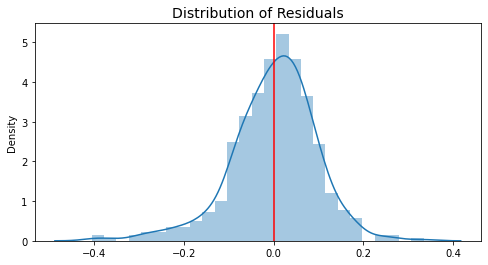

In [77]:
# looking at residuals or error in our predictions
res = y_train - y_train_pred
plt.figure(figsize=(8,4))
sns.distplot(res)
plt.axvline(res.mean(), c="red")
plt.title("Distribution of Residuals", fontsize=14)
plt.show()

In [78]:
#Residuals are following normal distribution and having mean of 0. 

In [79]:
# distribution of errors
a = [i for i in range(X_train.shape[0])]
fig = px.line(x=a, y=y_train-y_train_pred,title="Distribution of Errors - Training dataset")
fig.show()

In [80]:
#Errors are randomly distributed and not following any pattern

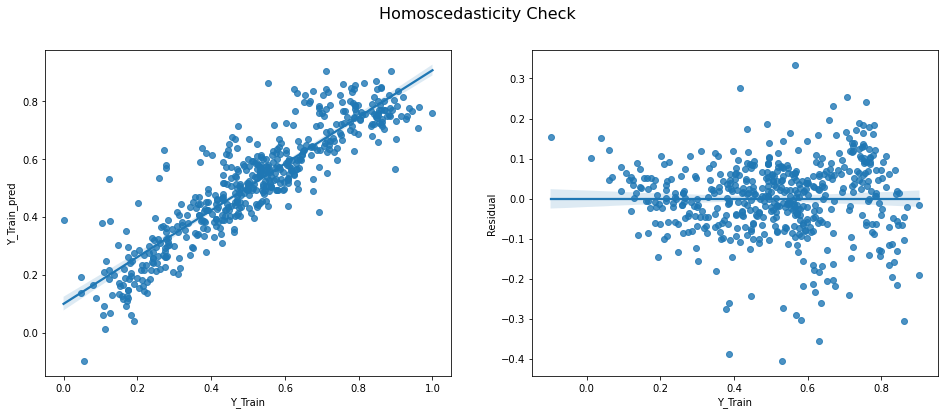

In [81]:
# homoscadasticity check 
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.regplot(x=y_train, y=y_train_pred)
plt.xlabel("Y_Train")
plt.ylabel("Y_Train_pred")
plt.subplot(122)
sns.regplot(x=y_train_pred, y=res)
plt.xlabel("Y_Train")
plt.ylabel("Residual")
plt.suptitle("Homoscedasticity Check", fontsize=16)
plt.show()

In [82]:
#Errors are showing almost constant variance

In [83]:
# This model satisfies all Linear Regression assumptions. 
# Hence, our Model is significant enough and can make good predictions.

In [84]:
# Analysisng actual vs predicted values
a = [i for i in range(X_train.shape[0])]
fig = go.Figure()
fig.add_trace(go.Scatter(x=a,y=y_train, name="Actual value"))
fig.add_trace(go.Scatter(x=a,y=y_train_pred, name="predicted value"))
fig.update_layout(title="Actual vs Predicted Values for Train Data Set",legend = dict(y=1.2, x=0.81))
fig.show()

In [85]:
#model evaluation

In [86]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_april,mnth_may,mnth_june,mnth_july,mnth_august,mnth_september,mnth_october,mnth_november,mnth_december,Ratio
196,0,0,1,28.153347,58.5000,13.958914,5923,0,1,0,...,0,0,0,1,0,0,0,0,0,1.449545
187,0,0,0,30.750000,65.1250,10.666400,4592,0,1,0,...,0,0,0,1,0,0,0,0,0,5.090186
14,0,0,1,9.566653,49.8750,10.583521,1248,0,0,0,...,0,0,0,0,0,0,0,0,0,4.621622
31,0,0,1,7.879134,82.9565,3.565271,1360,0,0,0,...,0,0,0,0,0,0,0,0,0,27.936170
390,1,0,0,14.008347,76.9583,4.917519,4075,0,0,0,...,0,0,0,0,0,0,0,0,0,15.700820


In [87]:
#Scaling test data
df_test[cont_var] = scaler.transform(df_test[cont_var])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_april,mnth_may,mnth_june,mnth_july,mnth_august,mnth_september,mnth_october,mnth_november,mnth_december,Ratio
196,0,0,1,0.771285,0.460557,0.415865,0.678900,0,1,0,...,0,0,0,1,0,0,0,0,0,0.010417
187,0,0,0,0.854058,0.552784,0.292782,0.525771,0,1,0,...,0,0,0,1,0,0,0,0,0,0.087810
14,0,0,1,0.178804,0.340487,0.289684,0.141049,0,0,0,...,0,0,0,0,0,0,0,0,0,0.077850
31,0,0,1,0.125012,0.801018,0.027323,0.153935,0,0,0,...,0,0,0,0,0,0,0,0,0,0.573477
390,1,0,0,0.320391,0.717517,0.077873,0.466291,0,0,0,...,0,0,0,0,0,0,0,0,0,0.313374


In [88]:
final_model.params.index

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_summer',
       'season_winter', 'weather_cloudy', 'weather_lightrain',
       'mnth_september'],
      dtype='object')

In [89]:
y_test = df_test.pop("cnt")

In [90]:
# Extracting Model parameters from Test Dataset
cols = final_model.params.index.tolist()
cols.remove("const")
cols

['yr',
 'holiday',
 'temp',
 'windspeed',
 'season_summer',
 'season_winter',
 'weather_cloudy',
 'weather_lightrain',
 'mnth_september']

In [91]:
X_test = df_test[cols]

In [92]:
# Dependent variables for Test Data set
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,temp,windspeed,season_summer,season_winter,weather_cloudy,weather_lightrain,mnth_september
196,1.0,0,0,0.771285,0.415865,0,0,0,0,0
187,1.0,0,0,0.854058,0.292782,0,0,0,0,0
14,1.0,0,0,0.178804,0.289684,0,0,1,0,0
31,1.0,0,0,0.125012,0.027323,0,0,1,0,0
390,1.0,1,0,0.320391,0.077873,0,0,1,0,0


In [93]:
# y predicted values
y_test_pred = final_model.predict(X_test_sm)
y_test_pred

196    0.505322
187    0.560979
14     0.135616
31     0.133749
390    0.455627
         ...   
391    0.445057
571    0.772377
306    0.457632
200    0.584910
235    0.484966
Length: 220, dtype: float64

In [94]:
# Checking the R-Square value of Test Data Set
r2_score_test = r2_score(y_pred=y_test_pred, y_true = y_test)
r2_score_test

0.8465456870291098

In [95]:
# Comparing R squared value of Test and Train Dataset
r2_score_train = r2_score(y_pred=y_train_pred, y_true = y_train)
r2_score_train

0.8062541490648033

In [96]:
# Our Model is performing better for the Test data set. 
# It is within the range of 5%, so it can be considered as Good Model.

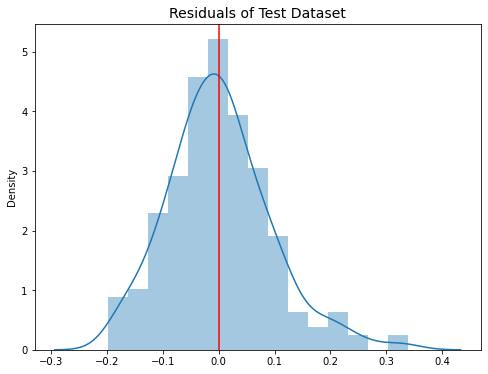

In [97]:
# analyse the residuals for test dataset
plt.figure(figsize=(8,6))
res_test = y_test_pred-y_test
sns.distplot(res_test)
plt.axvline(res_test.mean(), c="r")
plt.title("Residuals of Test Dataset", fontsize=14)
plt.show()

In [98]:
a = [i for i in range(X_test.shape[0])]
fig = px.line(x=a, y=y_test-y_test_pred,title="Error Pattern - Test Dataset")
fig.show()

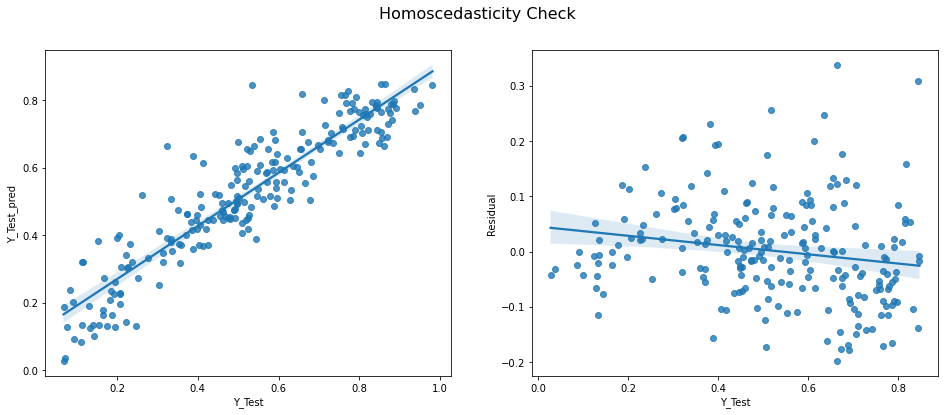

In [99]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.regplot(x=y_test, y=y_test_pred)
plt.xlabel("Y_Test")
plt.ylabel("Y_Test_pred")
plt.subplot(122)
sns.regplot(x=y_test_pred, y=res_test)
plt.xlabel("Y_Test")
plt.ylabel("Residual")
plt.suptitle("Homoscedasticity Check", fontsize=16)
plt.show()

In [100]:
a = [i for i in range(X_test.shape[0])]

fig = go.Figure()
fig.add_trace(go.Scatter(x=a, y=y_test, name="Actual Value", opacity=0.8))
fig.add_trace(go.Scatter(x=a, y=y_test_pred, name="Predicted Value", opacity=0.6))
fig.update_layout(title="Actual vs Predicted Values",legend = dict(y=1.2, x=0.81))
fig.show()

In [101]:
#Final interpretation of the model

In [102]:
round(lr_sm_7.params,3)

const                0.143
yr                   0.225
holiday             -0.076
temp                 0.523
windspeed           -0.100
season_summer        0.084
season_winter        0.125
weather_cloudy      -0.072
weather_lightrain   -0.261
mnth_september       0.092
dtype: float64

This is our final Model or the Equation of Best Fitted Line

cnt = 0.143 + 0.225 x yr -0.076 x holiday + 0.523 x temp - 0.1 x windspeed + 0.084 x season_summer + 0.125 * season_winter - 0.072 x weather_cloudy - 0.261 * weather_lightrain + 0.092 * mnth_september 